# Multilayer Perceptron Visualization
### Joseph Coston & Douglas Newquist
Final Project for CSE 489 Machine Learning

11/13/2021

In [18]:
# standard imports
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# project imports
import generator
import mlp

In [19]:
# generate some random datapoints
N = 100
pc = generator.pointCloud2D(f = lambda x,y : (x+y-1 > 0), n=N)

Text(0.5, 0.98, 'Actual Point Output Values')

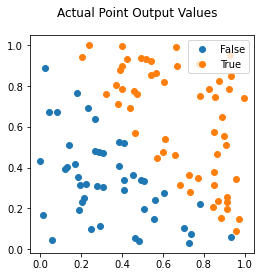

In [20]:
# plot the liearly separable distribution
fig, ax = pc.to_fig()
fig.suptitle('Actual Point Output Values')

In [21]:
# Example linear perceptron describing the line (x + y > 0)
s1 = mlp.Neuron([1,1.5], lambda x: x > 0, 0)
s1.evaluate((pc.data['x'][0],pc.data['y'][0]))

True

In [22]:
# visualize the output space
def visualize(o, dim, scale, offset=(0,0), mode='flatten'):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    if isinstance(o,mlp.Neuron) or isinstance(o, mlp.NeuralNetwork):
        plt.imshow(np.array(o.get_matrix(dim, scale, offset)).T, origin='lower')
    elif isinstance(o, mlp.Layer):
        plt.imshow(np.array(o.get_matrix(dim, scale, mode)).T, origin='lower')
    ax = plt.gca()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.locator_params(axis="x", nbins=10)
    plt.locator_params(axis="y", nbins=10)
    ax.set_xticklabels((ax.get_xticks()-dim/2)*scale, rotation = 45)
    ax.set_yticklabels((ax.get_yticks()-dim/2)*scale, rotation = 45)

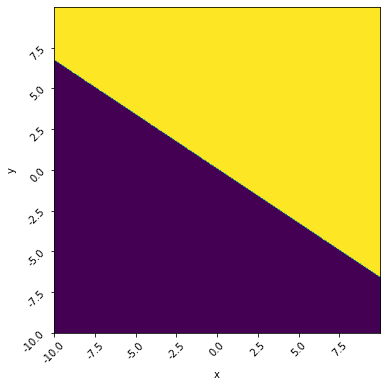

In [23]:
visualize(s1, 400, 0.05)

,Input,Layer 0,Output
0,1,True,False
1,1,False,
2,,True,


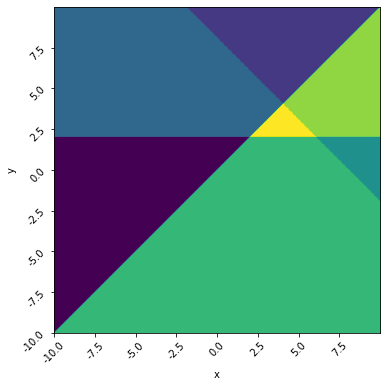

In [45]:
# Triangle with points (2,2), (4,4), (6,2)
line1 = mlp.Neuron([1, -1], lambda x: x >= 0, 0) # x - y >= 0
line2 = mlp.Neuron([0, 1], lambda x: x >= 0, -2) # y >= 2
line3 = mlp.Neuron([-1, -1], lambda x: x >= 0, 8) # -x -y + 8 >= 0

layer1 = mlp.Layer([line1, line2, line3])

all_neuron = mlp.Neuron([1,1,1], lambda x: x > 0, -2)
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.05, mode='gradient') # visualize the hidden layer

triangle = mlp.NeuralNetwork([layer1, layer2])
triangle.evaluate((1, 1), True)

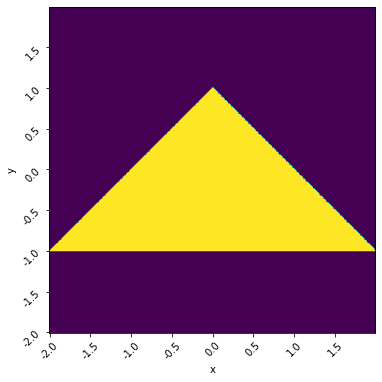

In [25]:
# visualize the output space
visualize(triangle, 400, 0.01, offset=(4,3))

,Input,Layer 0,Output
0,1,True,True
1,1,True,
2,,True,
3,,True,


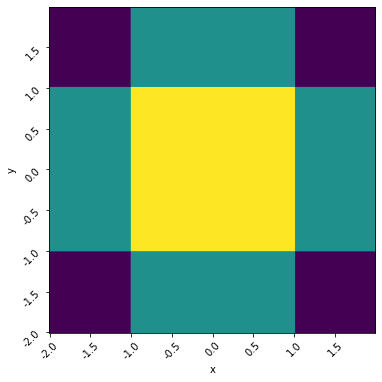

In [60]:
# square with vertices (-1,-1),(1,-1),(-1,1),(1,1)
line1 = mlp.Neuron([ 0,-1], lambda x: x >= 0, 1) #-y >= -1
line2 = mlp.Neuron([ 0, 1], lambda x: x >= 0, 1) # y >= -1
line3 = mlp.Neuron([-1, 0], lambda x: x >= 0, 1) #-x >= -1
line4 = mlp.Neuron([ 1, 0], lambda x: x >= 0, 1) # x >= -1

layer1 = mlp.Layer([line1, line2, line3, line4])  

all_neuron = mlp.Neuron([1,1,1,1], lambda x: x > 0, -3) # AND all lines
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.01, mode='add') # visualize the hidden layer


square = mlp.NeuralNetwork([layer1, layer2])
square.evaluate((1, 1), True)


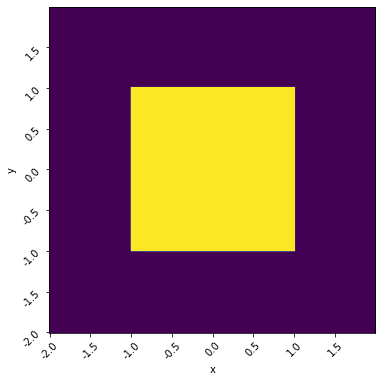

In [61]:
# visualize the output space
visualize(square, 400, 0.01)

In [28]:
# try more convex shapes 
# attempt complex shapes (chevron)
# attempt complex symbol
# linear activation functions
# possibly move to back prop later...

,Input,Layer 0,Layer 1,Output
0,0,True,False,True
1,-3,True,True,
2,,True,,
3,,False,,
4,,True,,
5,,True,,
6,,True,,
7,,True,,


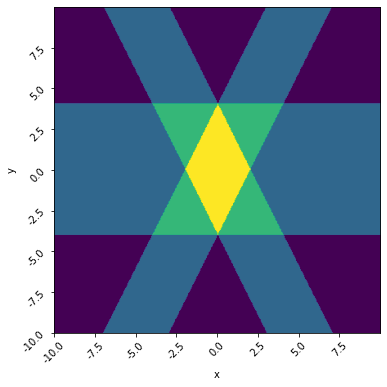

In [29]:
# points (-2,0),(2,0),(4,4),(-4,4) and (-2,0),(2,0),(4,-4),(-4,-4)

L1 = mlp.Neuron([0, 1], lambda x: x <= 0, -4)   # y <= 4
L2 = mlp.Neuron([-2, -1], lambda x: x <= 0, -4) # -2x -y -4 <= 0
L3 = mlp.Neuron([2, -1], lambda x: x <= 0, -4)  # 2x -y -4 <= 0 
L4 = mlp.Neuron([0, 1], lambda x: x >= 0, 0)    # y >= 0
L5 = mlp.Neuron([0, -1], lambda x: x > 0, 0)
L6 = mlp.Neuron([2, -1], lambda x: x >= 0, 4)   # 2x -y + 4 >= 0
L7 = mlp.Neuron([-2, -1], lambda x: x >= 0, 4)  # -2x -y + 4 >= 0
L8 = mlp.Neuron([0, 1], lambda x: x >= 0, 4)    # y >= -4

hourglass_lines = mlp.Layer([L1, L2, L3, L4, L5, L6, L7, L8])
visualize(hourglass_lines, 400, 0.05, mode='add')

trap1 = mlp.Neuron([1, 1, 1, 1, 0, 0, 0, 0], lambda x: x > 0, -3) # AND(L1, L2, L3, L4)
trap2 = mlp.Neuron([0, 0, 0, 0, 1, 1, 1, 1], lambda x: x > 0, -3) # AND(L5, L6, L7, L8)

hourglass_shapes = mlp.Layer([trap1, trap2])

or_neuron = mlp.Neuron([1, 1], lambda x: x > 0, 0)

hourglass = mlp.NeuralNetwork([hourglass_lines, hourglass_shapes, or_neuron])
hourglass.evaluate((0, -3), True)

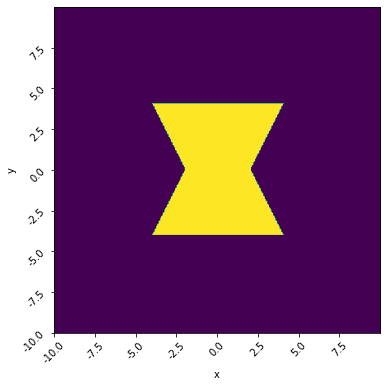

In [30]:
visualize(hourglass, 400, 0.05)

,Input,Layer 0,Output
0,1,True,True
1,1,True,
2,,False,
3,,True,
4,,True,


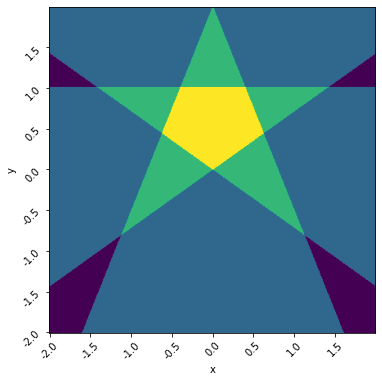

In [31]:
# star with vertices (
line1 = mlp.Neuron([  0,  1], lambda x: x <= 0, -1)   #        y - 1 <= 0
line2 = mlp.Neuron([ -5,  2], lambda x: x <= 0, -4)   # -5x + 2y - 4 <= 0
line3 = mlp.Neuron([  5,  2], lambda x: x <= 0, -4)   #  5x + 2y - 4 <= 0
line4 = mlp.Neuron([ 10,-14], lambda x: x <= 0, -0.1) # 10x -14y -.1 <= 0
line5 = mlp.Neuron([-10,-14], lambda x: x <= 0, -0.1) #-10x -14y -.1 <= 0

layer1 = mlp.Layer([line1, line2, line3, line4, line5])

all_neuron = mlp.Neuron([1,1,1,1,1], lambda x: x > 0, -3) # AND all partitions
layer2 = mlp.Layer([all_neuron])
visualize(layer1, 400, 0.01, mode='add') # visualize the hidden layer


star = mlp.NeuralNetwork([layer1, layer2])
star.evaluate((1, 1), True)


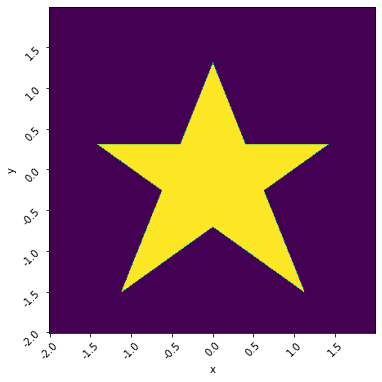

In [32]:
visualize(star, 400, 0.01, offset=(0,0.7))

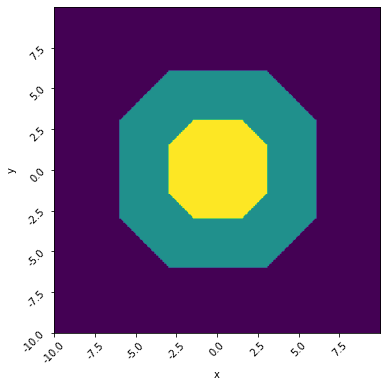

In [33]:

L1 = mlp.Neuron([0, 1], lambda x: x <= 0, -6)  # y >= 6
L2 = mlp.Neuron([-1, -1], lambda x: x >= 0, 9) # -x -y + 9>=0
L3 = mlp.Neuron([1, 0], lambda x: x <= 0, -6) # x <= 6
L4 = mlp.Neuron([1, -1], lambda x: x <= 0, -9) # x - y - 9 <= 0
L5 = mlp.Neuron([0, 1], lambda x: x >= 0, 6) # y >= -6
L6 = mlp.Neuron([-1, -1], lambda x: x <= 0, -9) # -x -y -9 <= 0
L7 = mlp.Neuron([1, 0], lambda x: x >= 0, 6) # x >= -6
L8 = mlp.Neuron([1, -1], lambda x: x >= 0, 9) # x - y + 9 >= 0

L9  = mlp.Neuron([0, 1], lambda x: x <= 0, -3)  # y >= 3
L10 = mlp.Neuron([-1, -1], lambda x: x >= 0, 4.5) # -x -y + 4.5>=0
L11 = mlp.Neuron([1, 0], lambda x: x <= 0, -3) # x <= 3
L12 = mlp.Neuron([1, -1], lambda x: x <= 0, -4.5) # x - y - 4.5 <= 0
L13 = mlp.Neuron([0, 1], lambda x: x >= 0, 3) # y >= -3
L14 = mlp.Neuron([-1, -1], lambda x: x <= 0, -4.5) # -x -y -4.5 <= 0
L15 = mlp.Neuron([1, 0], lambda x: x >= 0, 3) # x >= -3
L16 = mlp.Neuron([1, -1], lambda x: x >= 0, 4.5) # x - y + 4.5 >= 0

bolt_nut_lines = mlp.Layer([L1, L2, L3, L4, L5, L6, L7, L8,
						L9, L10, L11, L12, L13, L14, L15, L16])

hex1 = mlp.Neuron([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], lambda x: x > 0, -7)
hex2 = mlp.Neuron([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], lambda x: x > 0, -7)
bolt_nut_shapes = mlp.Layer([hex1, hex2])
bolt_nut_shape = mlp.Neuron([1, -1], lambda x: x >= 0, -1)

bolt_nut = mlp.NeuralNetwork([bolt_nut_lines, bolt_nut_shapes, bolt_nut_shape])
bolt_nut.evaluate((5, 0), True)
visualize(bolt_nut.parent, 400, 0.05)

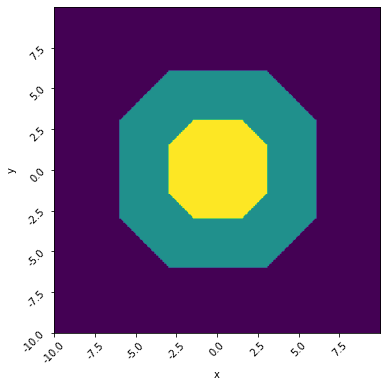

In [37]:
visualize(bolt_nut.subnet(0,2), 400 ,.05)

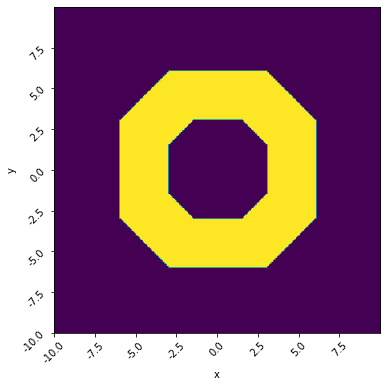

In [38]:
visualize(bolt_nut, 400, 0.05)

,Input,Layer 0,Layer 1,Layer 2,Output
0,0,False,False,False,True
1,-4,False,True,True,
2,,True,True,,
3,,True,True,,
4,,True,True,,
5,,True,,,
6,,True,,,
7,,True,,,
8,,True,,,
9,,True,,,


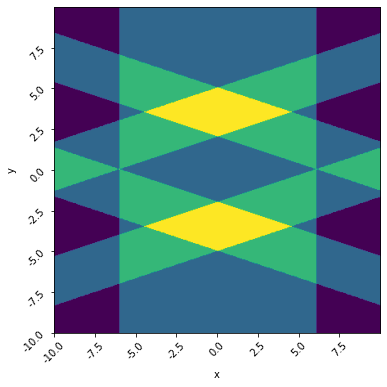

In [39]:
# Points (0, 2), (6, 4), (6, 7), (0, 5), (-6, 7), (-6, 4)
#    and (0,-2), (6,-3), (6, 0), (0,-5), (-6, 0), (-6,-3)

L1 = mlp.Neuron([-1/3, -1], lambda x: x <= 0, 2)  # -1/3x - y + 2 <= 0
L2 = mlp.Neuron([1/3, -1], lambda x: x <= 0, 2)   #  1/3x - y + 2 <= 0
L3 = mlp.Neuron([-1/3, -1], lambda x: x >= 0, 5)  # -1/3x - y + 5 <= 0
L4 = mlp.Neuron([1/3, -1], lambda x: x >= 0, 5)   #  1/3x - y + 5 <= 0
L5 = mlp.Neuron([1, 0], lambda x: x <= 0, -6)     #  x <= 6
L6 = mlp.Neuron([1, 0], lambda x: x >= 0, 6)      #  x >= -6
L7 = mlp.Neuron([-1/3, -1], lambda x: x <= 0, -5) # -1/3x - y - 5 <= 0
L8 = mlp.Neuron([1/3, -1], lambda x: x <= 0, -5)  #  1/3x - y - 5 <= 0
L9 = mlp.Neuron([-1/3, -1], lambda x: x >= 0, -2) # -1/3x - y - 2 >= 0
L10= mlp.Neuron([1/3, -1], lambda x: x >= 0, -2)  #  1/3x - y - 2 >= 0

chevron_lines = mlp.Layer([L1, L2, L3, L4, L5, L6, L7, L8, L9, L10])
visualize(chevron_lines, 400, 0.05, mode="add")

L1_and_L2 = mlp.Neuron([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], lambda x: x > 0, -1)
L3_or_l4  = mlp.Neuron([0, 0, 1, 1, 0, 0, 0, 0, 0, 0], lambda x: x > 0, 0)
L5_and_l6 = mlp.Neuron([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], lambda x: x > 0, -1)
L7_and_L8 = mlp.Neuron([0, 0, 0, 0, 0, 0, 1, 1, 0, 0], lambda x: x > 0, -1)
L9_or_L10 = mlp.Neuron([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], lambda x: x > 0, 0)

chevron_regions = mlp.Layer([L1_and_L2, L3_or_l4, L5_and_l6, L7_and_L8, L9_or_L10])

A = mlp.Neuron([1, 1, 1, 0, 0, 0], lambda x: x > 0, -2)
B = mlp.Neuron([0, 0, 1, 1, 1], lambda x: x > 0, -2)

chevron_shapes = mlp.Layer([A, B])

# True if either shape is detected
chevron_shape = mlp.Neuron([1, 1], lambda x: x > 0, 0)

chevron = mlp.NeuralNetwork([chevron_lines, chevron_regions, chevron_shapes, chevron_shape])
chevron.evaluate((0,-4), True)

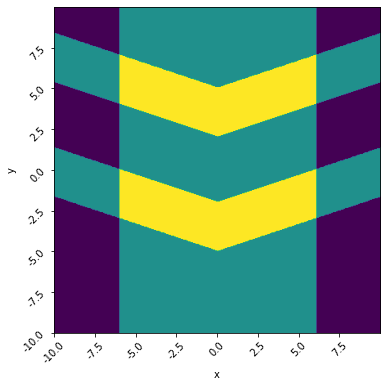

In [40]:
# Render the second layer
visualize(chevron.subnet(0, 2), 400, 0.05, mode="add")

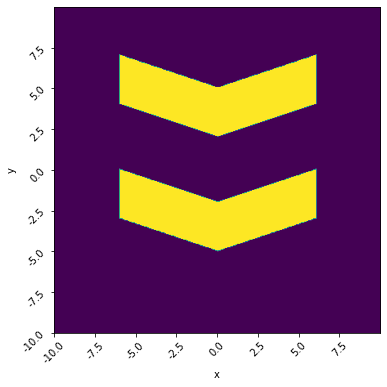

In [41]:
visualize(chevron, 400, 0.05)

,Input,Layer 0,Layer 1,Output
0,0,True,False,False
1,-4,True,False,
2,,True,False,
3,,True,False,
4,,False,,
5,,True,,
6,,True,,
7,,True,,
8,,True,,


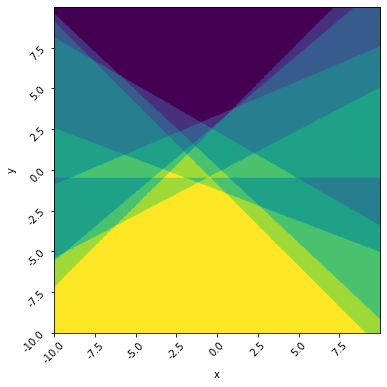

In [42]:
# Points    (-5.4,0.9), (-8.8,-0.5), (-3.3,0.1),
#           (-2.1,1.2), (-1.9,0.1), (-1.4,1.4),
#           (0.2,-0.1), (2.3,1), (5,-0.5)

L1 = mlp.Neuron([ 1.4,-3.3], lambda x: x >= 0, 10.9) #  1.4x - 3.3y + 10.9 <= 0
L2 = mlp.Neuron([ 0.8, 2.1], lambda x: x <= 0,  2.7) #  0.8x + 2.1y +  2.7 >= 0
L3 = mlp.Neuron([-1.1, 1.3], lambda x: x <= 0, -3.7) # -1.1x + 1.3y -  3.7 >= 0
L4 = mlp.Neuron([ 0.2, 0.2], lambda x: x <= 0,  0.2) #  0.2x + 0.2y +  0.2 >= 0

L5 = mlp.Neuron([0, 13.7], lambda x: x >= 0, 7.1)    #  0.0x +13.7y +  7.1 >= 0

L6 = mlp.Neuron([-0.5, 0.5], lambda x: x <= 0, -1.4) # -0.5x + 0.5y -  1.4 <= 0
L7 = mlp.Neuron([ 1.5, 1.6], lambda x: x <= 0, -0.2) #  1.5x + 1.6y -  0.2 <= 0
L8 = mlp.Neuron([-1.1, 2.1], lambda x: x <= 0,  0.4) # -1.1x + 2.1y +  0.4 <= 0
L9 = mlp.Neuron([ 1.5, 2.6], lambda x: x <= 0, -5.9) #  1.5x + 2.6y -  5.9 <= 0

Mmountain_lines = mlp.Layer([L1, L2, L3, L4, L5, L6, L7, L8, L9])
visualize(Mmountain_lines, 400, 0.05, mode="add")

L1_and_L2_and_L5 = mlp.Neuron([1, 1, 0, 0, 1, 0, 0, 0, 0], lambda x: x > 0, -2)
L3_and_L4_and_L5 = mlp.Neuron([0, 0, 1, 1, 1, 0, 0, 0, 0], lambda x: x > 0, -2)
L5_and_L6_and_L7 = mlp.Neuron([0, 0, 0, 0, 1, 1, 1, 0, 0], lambda x: x > 0, -2)
L5_and_L8_and_L8 = mlp.Neuron([0, 0, 0, 0, 1, 0, 0, 1, 1], lambda x: x > 0, -2)

Mmountain_peaks = mlp.Layer([L1_and_L2_and_L5, L3_and_L4_and_L5, L5_and_L6_and_L7, L5_and_L8_and_L8])

or_all  = mlp.Neuron([1, 1, 1, 1], lambda x: x > 0, 0)

Mmountain_shape = mlp.Layer([or_all])

# # True if either shape is detected
# chevron_shape = mlp.Neuron([1, 1], lambda x: x > 0, 0)

Mmountain = mlp.NeuralNetwork([Mmountain_lines, Mmountain_peaks, Mmountain_shape])
Mmountain.evaluate((0,-4), True)

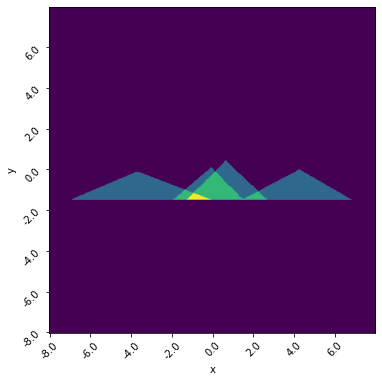

In [43]:
visualize(Mmountain.subnet(0,2), 400, 0.04, offset=(-2,1))

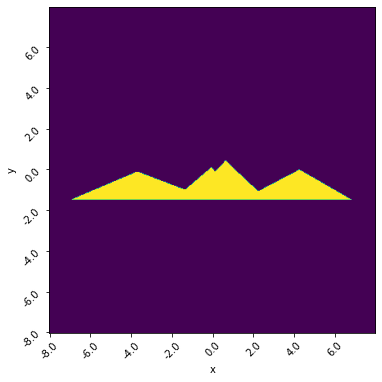

In [44]:
visualize(Mmountain, 400, 0.04, offset=(-2,1))

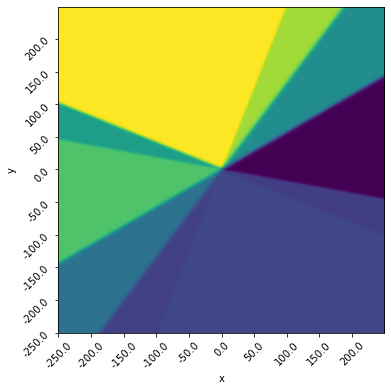

In [ ]:
# generate and visualize a random neural network
random = mlp.NeuralNetwork(layers=[2,5,5,1])
visualize(random, 500, 1)